In [45]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.templates.default = "plotly_dark"
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

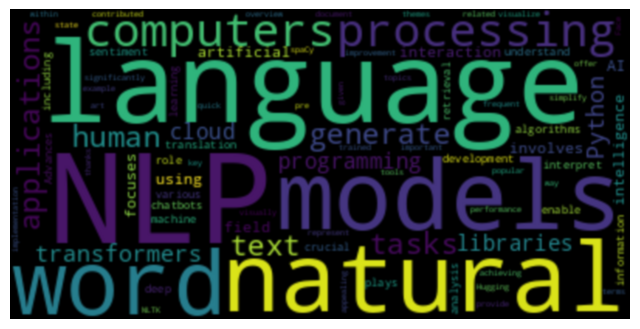

In [46]:
# WordCloud Code Demonstration
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Example text data
text_data = """
Natural language processing (NLP) is a field of artificial intelligence (AI) that focuses on the interaction between computers and humans using natural language. It involves the development of algorithms and models to enable computers to understand, interpret, and generate human-like text.

NLP plays a crucial role in various applications, including machine translation, sentiment analysis, chatbots, and information retrieval. Advances in deep learning have significantly contributed to the improvement of NLP tasks, with models like transformers achieving state-of-the-art performance.

Python is a popular programming language for NLP tasks, thanks to libraries like NLTK, spaCy, and Hugging Face's Transformers. These libraries provide tools and pre-trained models that simplify the implementation of NLP applications.

Word clouds are a visually appealing way to represent the most frequent words in a given text. They offer a quick overview of the key themes and topics within a document. In this example, we generate a word cloud to visualize the important terms related to natural language processing and Python programming.
"""

# Create WordCloud object
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black').generate(text_data)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis('off')
plt.show()

In [3]:
# Load Dataset

# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading Dataset
shark_tank = pd.read_csv('/content/drive/MyDrive/Shark tank EDA/Shark Tank India.csv')

**DATA** **EXPLORATION**

In [5]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

In [6]:
# First Look

# Checking the first 5 rows of data
shark_tank.head()


,Season Number,Startup Name,Season Start,Season End,Episode Number,Episode Title,Anchor,Pitch Number,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Debt Interest,Deal Valuation,Number of sharks in deal,Deal has conditions,Has Patents,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Guest Name,Ashneer Present,Namita Present,Anupam Present,Vineeta Present,Aman Present,Peyush Present,Ghazal Present,Amit Present,Guest Present
0,1,BluePineFoods,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,Rannvijay Singh,1,Food,Frozen Momos,https://bluepinefoods.com/,3,2.0,1.0,NaN,0.0,Middle,2016.0,Delhi,Delhi,95.0,8.0,NaN,NaN,50.0,5.0,1000.0,1,1.0,75.0,16.00,NaN,NaN,469.0,3.0,NaN,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,5.33,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,1,BoozScooters,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,Rannvijay Singh,2,Vehicles/Electrical Vehicles,Renting e-bike for mobility in private spaces,https://www.boozup.net/,1,1.0,NaN,NaN,0.0,Young,2017.0,Ahmedabad,Gujarat,4.0,0.4,NaN,NaN,40.0,15.0,267.0,1,1.0,40.0,50.00,NaN,NaN,80.0,2.0,NaN,NaN,20.0,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,25.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2,1,HeartUpMySleeves,20-Dec-21,04-Feb-22,1,Badlegi Business Ki Tasveer,Rannvijay Singh,3,Beauty/Fashion,Detachable Sleeves,https://heartupmysleeves.com/,1,NaN,1.0,NaN,0.0,Young,2021.0,Delhi,Delhi,NaN,2.0,NaN,NaN,25.0,10.0,250.0,1,1.0,25.0,30.00,NaN,NaN,83.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.5,15.0,NaN,12.5,15.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,1,TagzFoods,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",Rannvijay Singh,4,Food,Healthy Potato Chips Snacks,https://tagzfoods.com/,2,2.0,NaN,NaN,0.0,Middle,2019.0,Bangalore,Karnataka,700.0,NaN,48.0,NaN,70.0,1.0,7000.0,1,1.0,70.0,2.75,NaN,NaN,2545.0,1.0,NaN,NaN,70.0,2.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
4,1,HeadAndHeart,20-Dec-21,04-Feb-22,2,"Insaan, Ideas Aur Sapne",Rannvijay Singh,5,Education,Brain Development Course,https://thehnh.in/,4,1.0,3.0,NaN,1.0,Middle,2015.0,Patiala,Punjab,30.0,NaN,NaN,NaN,50.0,5.0,1000.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN


In [7]:
# Checking the bottom 5 rows of the data
shark_tank.tail()

,Season Number,Startup Name,Season Start,Season End,Episode Number,Episode Title,Anchor,Pitch Number,Industry,Business Description,Company Website,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Pitchers Average Age,Started in,Pitchers City,Pitchers State,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Debt Interest,Deal Valuation,Number of sharks in deal,Deal has conditions,Has Patents,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Guest Name,Ashneer Present,Namita Present,Anupam Present,Vineeta Present,Aman Present,Peyush Present,Ghazal Present,Amit Present,Guest Present
316,2,GODESi,02-Jan-23,10-Mar-23,51,Gateway To Shark Tank India,Rahul Dua,317,Food,Handmade lollipops,https://godesi.in/,2,1.0,1.0,NaN,0.0,Middle,NaN,Bangalore,Karnataka,-1.0,270.0,NaN,NaN,90.0,0.5,18000.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0
317,2,TAC,02-Jan-23,10-Mar-23,51,Gateway To Shark Tank India,Rahul Dua,318,Beauty/Fashion,"ayurveda co for glowing skin, makeup & open pores",https://theayurvedaco.com/,2,1.0,1.0,NaN,1.0,Middle,NaN,Mumbai,Maharashtra,-1.0,NaN,NaN,NaN,150.0,0.5,30000.0,1,1.0,81.0,1.0,69.0,12.0,8100.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.5,0.5,34.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.5,0.5,34.5,Vikas,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0
318,2,Naara-Aaba,02-Jan-23,10-Mar-23,51,Gateway To Shark Tank India,Rahul Dua,319,Liquor/Beverages,pears and plum wine,https://www.naaraaaba.com/,2,1.0,1.0,NaN,1.0,Middle,2017.0,Ziro,Arunachal Pradesh,NaN,NaN,50.0,18.0,75.0,2.5,3000.0,1,1.0,50.0,5.0,25.0,10.0,1000.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,2.5,12.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,2.5,12.5,Vikas,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0
319,2,StyloBug,02-Jan-23,10-Mar-23,51,Gateway To Shark Tank India,Rahul Dua,320,Beauty/Fashion,Girls Dresses Online,https://stylobug.com/,2,1.0,1.0,NaN,NaN,Middle,NaN,Delhi,Delhi,1400.0,46.0,NaN,18.0,80.0,2.0,4000.0,1,1.0,80.0,10.0,NaN,NaN,800.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0
320,2,ZenOnco,02-Jan-23,10-Mar-23,0,Unseen,Rahul Dua,321,Medical/Health,saving lives from cancer,https://zenonco.io/,2,1.0,1.0,NaN,0.0,Middle,NaN,Jodhpur,Rajasthan,-1.0,21.0,NaN,NaN,100.0,1.0,10000.0,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0


In [8]:
# Dataset Columns
shark_tank.columns

Index(['Season Number', 'Startup Name', 'Season Start', 'Season End',
       'Episode Number', 'Episode Title', 'Anchor', 'Pitch Number', 'Industry',
       'Business Description', 'Company Website', 'Number of Presenters',
       'Male Presenters', 'Female Presenters', 'Transgender Presenters',
       'Couple Presenters', 'Pitchers Average Age', 'Started in',
       'Pitchers City', 'Pitchers State', 'Yearly Revenue', 'Monthly Sales',
       'Gross Margin', 'Net Margin', 'Original Ask Amount',
       'Original Offered Equity', 'Valuation Requested', 'Received Offer',
       'Accepted Offer', 'Total Deal Amount', 'Total Deal Equity',
       'Total Deal Debt', 'Debt Interest', 'Deal Valuation',
       'Number of sharks in deal', 'Deal has conditions', 'Has Patents',
       'Ashneer Investment Amount', 'Ashneer Investment Equity',
       'Ashneer Debt Amount', 'Namita Investment Amount',
       'Namita Investment Equity', 'Namita Debt Amount',
       'Anupam Investment Amount', 'Anupam I

In [9]:
# Dataset Info

# Data information. Inspecting each columns and its dtype
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              321 non-null    int64  
 1   Startup Name               321 non-null    object 
 2   Season Start               321 non-null    object 
 3   Season End                 321 non-null    object 
 4   Episode Number             321 non-null    int64  
 5   Episode Title              321 non-null    object 
 6   Anchor                     321 non-null    object 
 7   Pitch Number               321 non-null    int64  
 8   Industry                   321 non-null    object 
 9   Business Description       321 non-null    object 
 10  Company Website            310 non-null    object 
 11  Number of Presenters       321 non-null    int64  
 12  Male Presenters            282 non-null    float64
 13  Female Presenters          150 non-null    float64

In [10]:
# Dataset Describe

# Checking statistical data on numerical columns
shark_tank.describe()

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Started in,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Debt Interest,Deal Valuation,Number of sharks in deal,Has Patents,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Ashneer Present,Namita Present,Anupam Present,Vineeta Present,Aman Present,Peyush Present,Ghazal Present,Amit Present,Guest Present
count,321.000000,321.000000,321.000000,321.000000,282.000000,150.000000,3.0,316.000000,184.000000,135.000000,141.000000,85.000000,24.000000,321.000000,321.000000,321.000000,321.000000,217.000000,176.000000,176.000000,39.000000,23.000000,176.000000,176.000000,7.0,21.000000,21.000000,2.00000,66.000000,66.000000,13.000000,51.000000,51.000000,4.000000,43.000000,43.000000,9.000000,73.000000,73.000000,8.000000,69.000000,69.000000,11.000000,8.000000,8.000000,0.0,21.000000,21.000000,4.000000,2.000000,2.000000,2.000000,99.0,276.0,282.0,187.0,268.0,233.0,26.0,83.0,5.0
mean,1.526480,21.482866,161.000000,2.077882,1.719858,1.193333,1.0,0.186709,2018.472826,353.303704,42.191149,53.494118,23.500000,168.663555,4.076293,5120.452337,0.676012,0.811060,62.531824,10.169432,46.435897,10.260870,1782.786824,2.011364,1.0,25.682381,4.440000,57.00000,31.780459,4.569600,40.396923,28.454123,5.996627,24.375000,27.223256,5.634930,25.462222,34.384110,3.574419,38.895000,32.034496,6.117594,31.090909,19.998782,6.462500,NaN,38.138571,5.190314,36.250000,32.750000,1.500000,23.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.500078,14.702695,92.808944,0.846044,0.866269,0.428775,0.0,0.390296,2.495750,915.969002,90.121564,22.593522,10.615821,1671.576903,3.624677,9890.567280,0.468726,0.392366,36.267912,10.640055,27.782799,3.683099,2831.961861,1.126251,0.0,16.860620,5.065662,59.39697,19.778840,5.537446,22.126450,20.496261,5.842439,17.365555,17.354558,5.301753,15.150836,22.681545,5.038466,16.967353,20.142965,11.856430,15.332675,10.946848,5.326199,NaN,26.305707,5.599211,23.935678,10.960155,1.414214,15.556349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,2005.000000,-1.000000,0.000000,3.000000,3.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.500000,20.000000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,15.00000,0.000016,0.200000,12.500000,0.000000,0.166000,12.500000,5.000000,0.300000,12.500000,0.000000,0.166000,16.660000,0.000000,0.166000,10.000000,0.000253,1.000000,NaN,5.000000,1.000000,10.000000,25.000000,0.500000,12.500000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.000000,9.000000,81.000000,2.000000,1.000000,1.000000,1.0,0.000000,2017.000000,0.000000,3.500000,40.000000,18.000000,50.000000,1.500000,1000.000000,0.000000,1.000000,40.000000,3.000000,25.000000,10.000000,324.750000,1.000000,1.0,15.000000,2.000000,36.00000,19.250000,1.041650,25.000000,15.415000,1.593000,14.375000,15.830000,2.250000,12.500000,17.660000,1.000000,28.750000,20.000000,1.000000,23.500000,14.995000,4.050000,NaN,18.750000,1.500000,21.250000,28.875000,1.000000,18.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,2.000000,21.000000,161.000000,2.000000,2.000000,1.000000,1.0,0.000000,2019.000000,100.000000,14.000000,51.000000,22.500000,65.000000,3.000000,2000.000000,1.000000,1.000000,50.00000

In [11]:
# Dataset Rows & Columns count
shark_tank.shape

(321, 74)

**CHECKING FOR DUPLICATE VALUES**

In [12]:
# Dataset Duplicate Value Count
duplicate_values_count = len(shark_tank[shark_tank.duplicated()])

print("Number of duplicate values:", duplicate_values_count)

Number of duplicate values: 0


**Missing Values/Null Values**

In [13]:
# Finding Null Values Count
shark_tank.isnull().sum().sort_values(ascending=False)

,0
Ghazal Debt Amount,321
Ashneer Debt Amount,319
Guest Name,319
Guest Debt Amount,319
Guest Investment Equity,319
...,...
Number of Presenters,0
Pitchers City,0
Pitchers State,0
Original Ask Amount,0


Text(0.5, 1.0, 'Places of missing values in the columns')

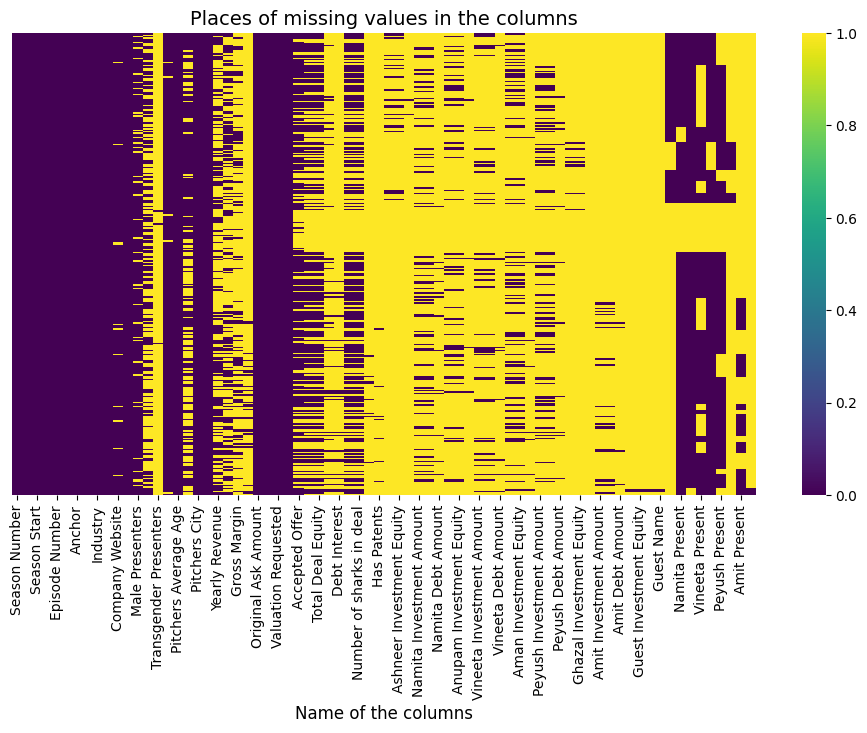

In [14]:
# Visualizing the missing values
# Creating heatmap for null values
plt.figure(figsize = (12,6))
sns.heatmap(shark_tank.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')
plt.xlabel("Name of the columns", fontsize = 12)
plt.title("Places of missing values in the columns", fontsize = 14)

**Correlation Matrix**

In [15]:
# Drop non-numeric columns before calculating correlation
numeric_shark_tank = shark_tank.select_dtypes(include=np.number)

# Calculate and display the correlation matrix
numeric_shark_tank.corr(method = 'pearson').T.round(2).style.background_gradient(cmap='viridis')

,Season Number,Episode Number,Pitch Number,Number of Presenters,Male Presenters,Female Presenters,Transgender Presenters,Couple Presenters,Started in,Yearly Revenue,Monthly Sales,Gross Margin,Net Margin,Original Ask Amount,Original Offered Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Debt Interest,Deal Valuation,Number of sharks in deal,Has Patents,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Amit Investment Amount,Amit Investment Equity,Amit Debt Amount,Guest Investment Amount,Guest Investment Equity,Guest Debt Amount,Ashneer Present,Namita Present,Anupam Present,Vineeta Present,Aman Present,Peyush Present,Ghazal Present,Amit Present,Guest Present
Season Number,1.000000,0.390000,0.860000,0.010000,0.040000,0.070000,nan,-0.070000,0.090000,-0.030000,0.280000,0.000000,nan,-0.050000,-0.250000,0.090000,0.090000,0.190000,0.110000,-0.410000,0.150000,nan,0.270000,-0.150000,nan,nan,nan,nan,0.140000,-0.170000,0.210000,0.340000,-0.150000,0.360000,0.280000,-0.390000,-0.110000,0.170000,-0.350000,-0.260000,0.160000,-0.360000,0.480000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Episode Number,0.390000,1.000000,0.630000,-0.000000,0.070000,0.010000,nan,-0.070000,-0.030000,0.120000,0.150000,-0.040000,-0.080000,-0.040000,-0.140000,0.070000,0.000000,0.060000,0.040000,-0.160000,-0.050000,0.290000,0.110000,0.020000,nan,-0.270000,-0.180000,1.000000,-0.090000,-0.070000,-0.290000,-0.080000,-0.190000,-0.770000,0.040000,-0.410000,-0.280000,0.080000,-0.180000,-0.270000,0.080000,-0.040000,0.190000,-0.420000,0.030000,nan,-0.050000,-0.310000,0.950000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Pitch Number,0.860000,0.630000,1.000000,-0.000000,0.030000,-0.020000,nan,-0.070000,0.110000,0.030000,0.270000,-0.030000,-0.090000,-0.070000,-0.220000,0.090000,-0.070000,0.080000,0.100000,-0.390000,0.090000,0.310000,0.260000,-0.100000,nan,-0.260000,-0.160000,1.000000,0.060000,-0.160000,-0.120000,0.230000,-0.200000,-0.020000,0.220000,-0.490000,-0.240000,0.160000,-0.340000,-0.340000,0.170000,-0.330000,0.460000,0.100000,-0.260000,nan,-0.050000,-0.310000,0.950000,-1.000000,1.000000,-1.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan
Number of Presenters,0.010000,-0.000000,-0.000000,1.000000,0.760000,0.320000,nan,0.140000,-0.040000,-0.050000,0.040000,-0.170000,0.080000,-0.070000,-0.150000,0.040000,0.060000,-0.020000,0.080000,-0.260000,0.290000,0.270000,0.150000,0.030000,nan,-0.080000,-0.280000,nan,-0.090000,-0.110000,-0.250000,0.010000,-0.290000,nan,0.190000,-0.230000,-0.320000,0.130000,0.030000,0.490000,0.090000,-0.320000,0.500000,0.280000,-0.450000,nan,-0.290000,-0.070000,0.800000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Male Presenters,0.040000,0.070000,0.030000,0.760000,1.000000,-0.020000,nan,-0.340000,0.000000,-0.040000,0.060000,-0.100000,-0.150000,-0.040000,-0.170000,0.040000,0.030000,0.070000,0.100000,-0.150000,0.360000,0.150000,0.210000,0.050000,nan,-0.170000,-0.170000,1.000000,0.000000,-0.170000,0.250000,-0.010000,-0.230000,0.460000,-0.080000,-0.020000,0.160000,0.240000,0.060000,0.330000,0.070000,-0.200000,0.380000,0.060000,-0.280000,nan,-0.200000,-0.370000,0.870000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Female Presenters,0.070000,0.010000,-0.020000,0.320000,-0.020000,1.000000,nan,-0.090000,0.040000,-0.150000,-0.060000,0.080000,0.190000,-0.050000,0.010000,0.080000,0.130000,-0.100000,-0.170000,-0.000000,-0.140000,-0.340000,-0.070000,-0.150000,nan,nan,nan,nan,-0.160000,-0.140000,-0.590000,-0.070000,0.000000,nan,0.010000,-0.120000,-0.

# EDA (Exploratory Data Analysis)

## Season 1 & 2 - Shark Tank India

In [16]:
shark_tank['Season Number'].value_counts()

,count
Season Number,
2,169
1,152


In [17]:
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Episode Number'].max(), "episodes \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

2 seasons 

51 episodes 

321 startup companies came for pitching 



### Distribution of Cities from which Pitchers came

In [18]:
print(shark_tank['Pitchers City'].value_counts().head(20))


Pitchers City
Mumbai         56
Delhi          44
Bangalore      32
Pune           20
Ahmedabad      19
Gurgaon        15
Hyderabad      12
Kolkata        12
Jaipur          7
Noida           7
Chennai         6
Surat           6
Ludhiana        4
Nagpur          3
Gandhinagar     3
Thane           3
Goa             3
Indore          3
Jammu           2
Lucknow         2
Name: count, dtype: int64


Text(0.5, 1.0, 'Pitchers Cities Count')

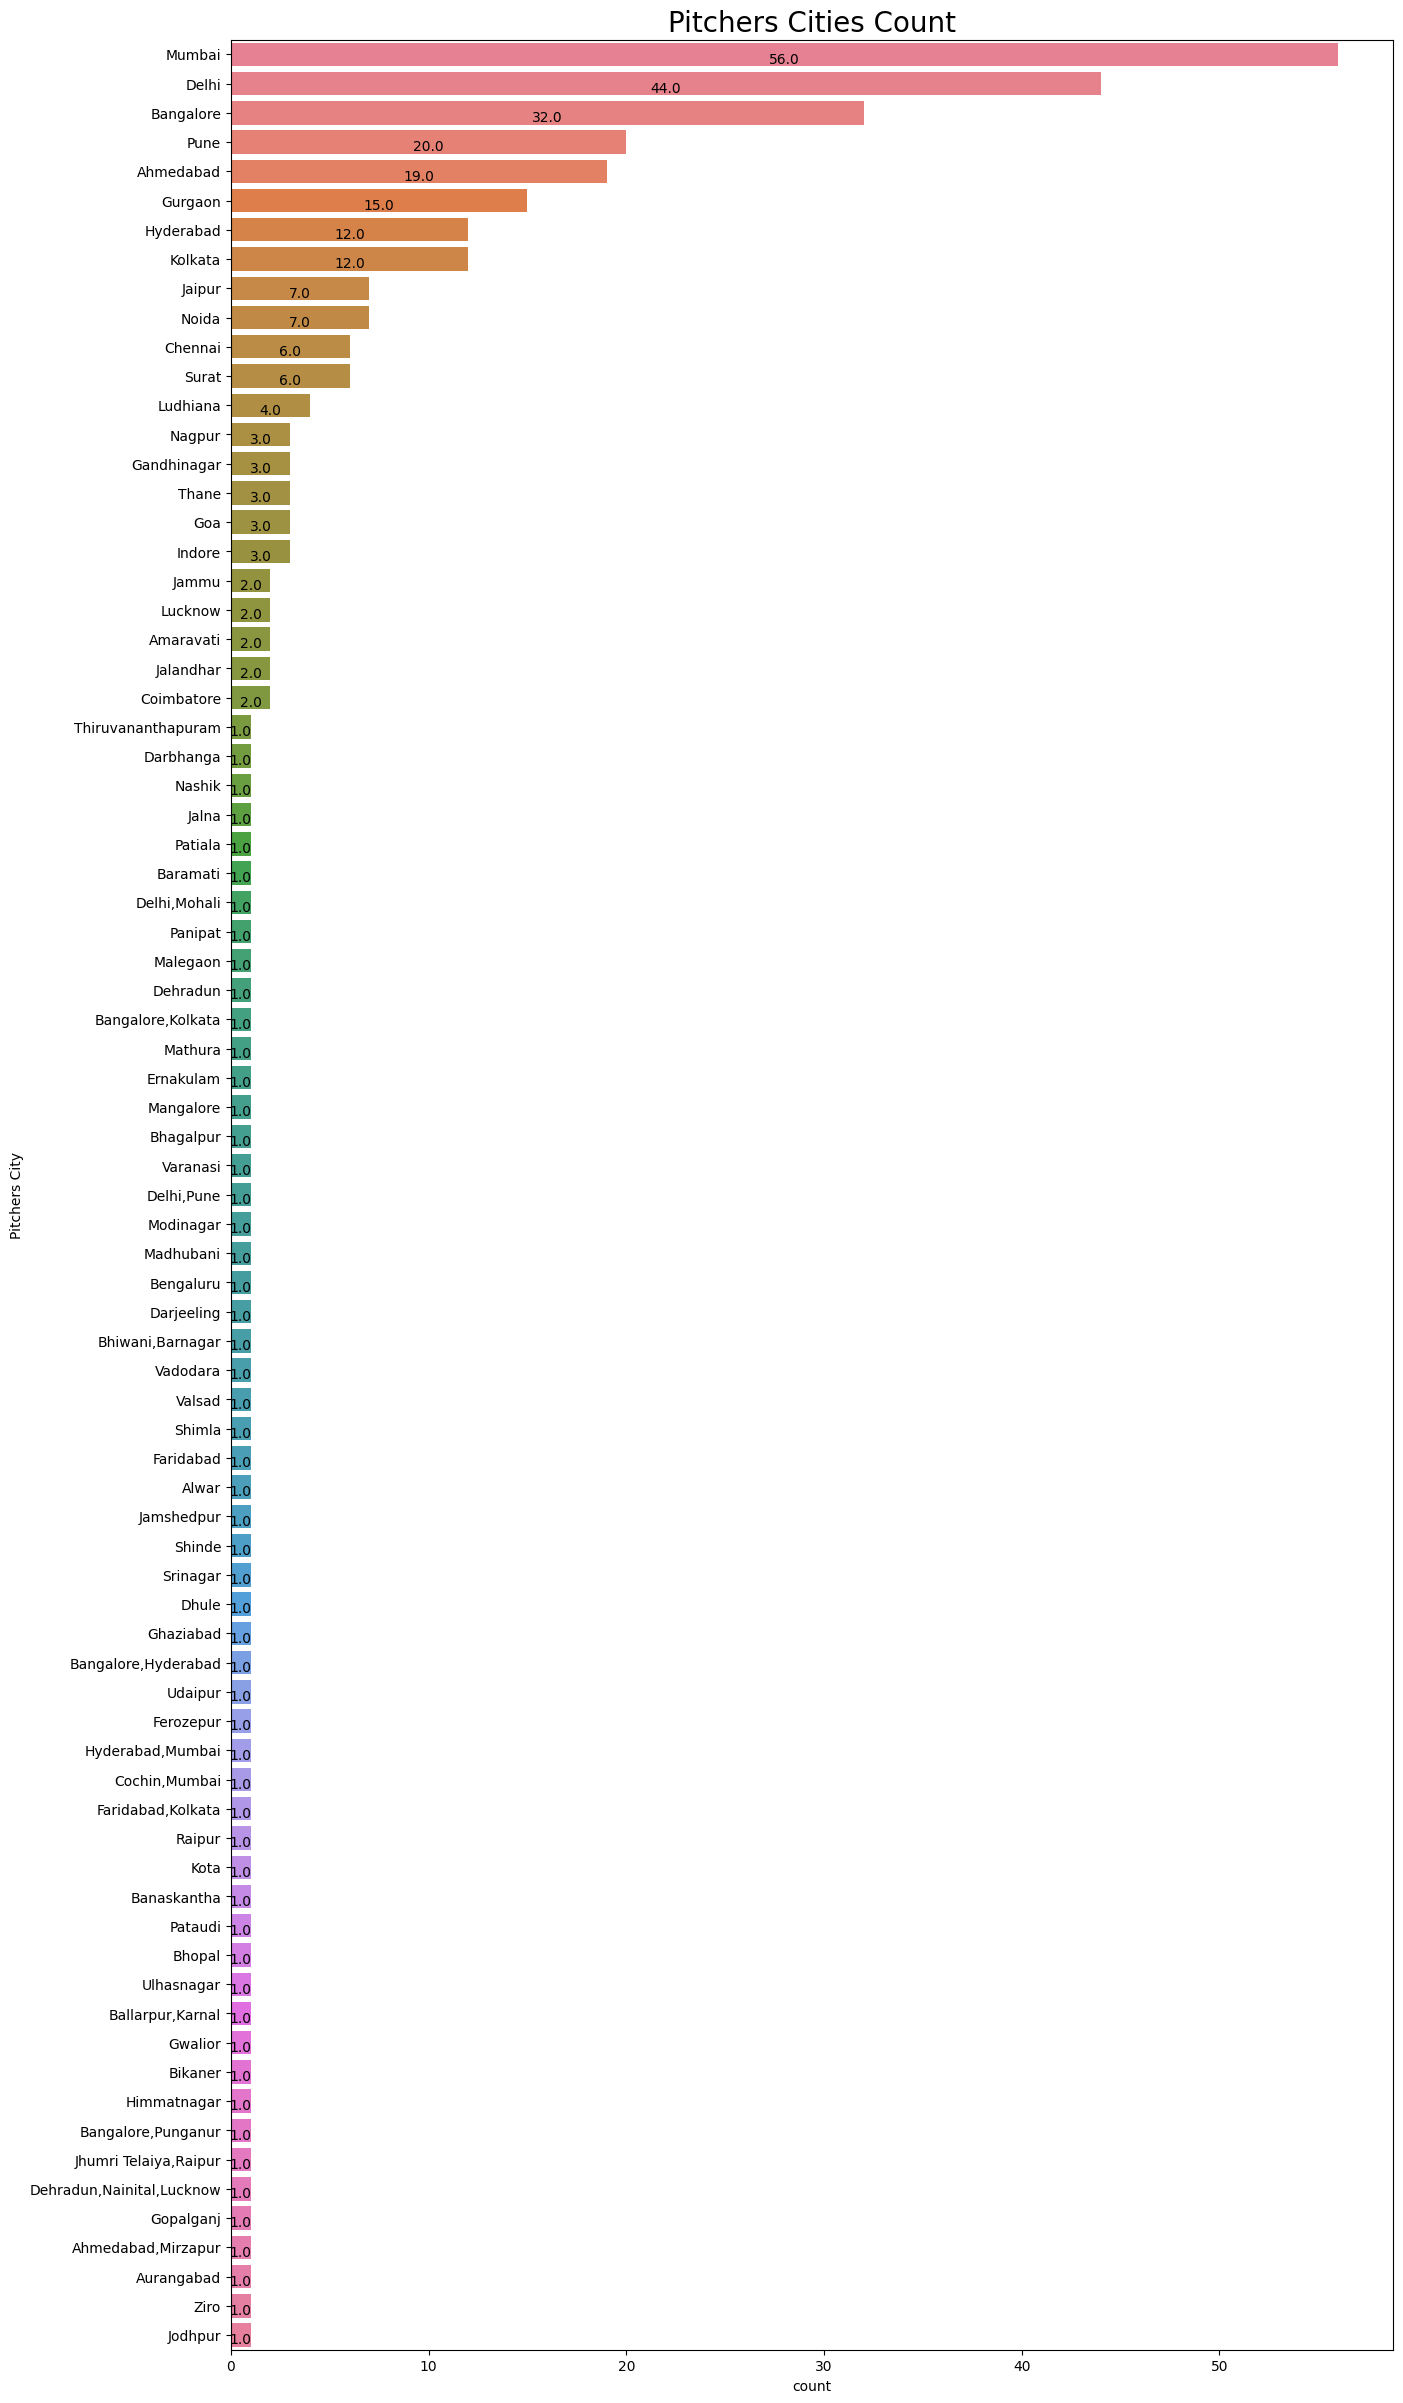

In [19]:
plt.figure(figsize=(15,30))
ax = sns.countplot(data=shark_tank,y='Pitchers City', orient='h',order=shark_tank['Pitchers City'].value_counts().index, palette='husl')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height()), ha='center', va='bottom')
plt.title('Pitchers Cities Count',size=20)

### Year in which Startups began their operation

In [20]:
print(shark_tank['Started in'].value_counts(),'\n')

Started in
2019.0    38
2020.0    31
2021.0    27
2018.0    26
2017.0    22
2016.0    18
2022.0     9
2015.0     4
2014.0     4
2005.0     1
2013.0     1
2012.0     1
2006.0     1
2010.0     1
Name: count, dtype: int64 



Text(0.5, 1.0, 'Startup Commencement Year')

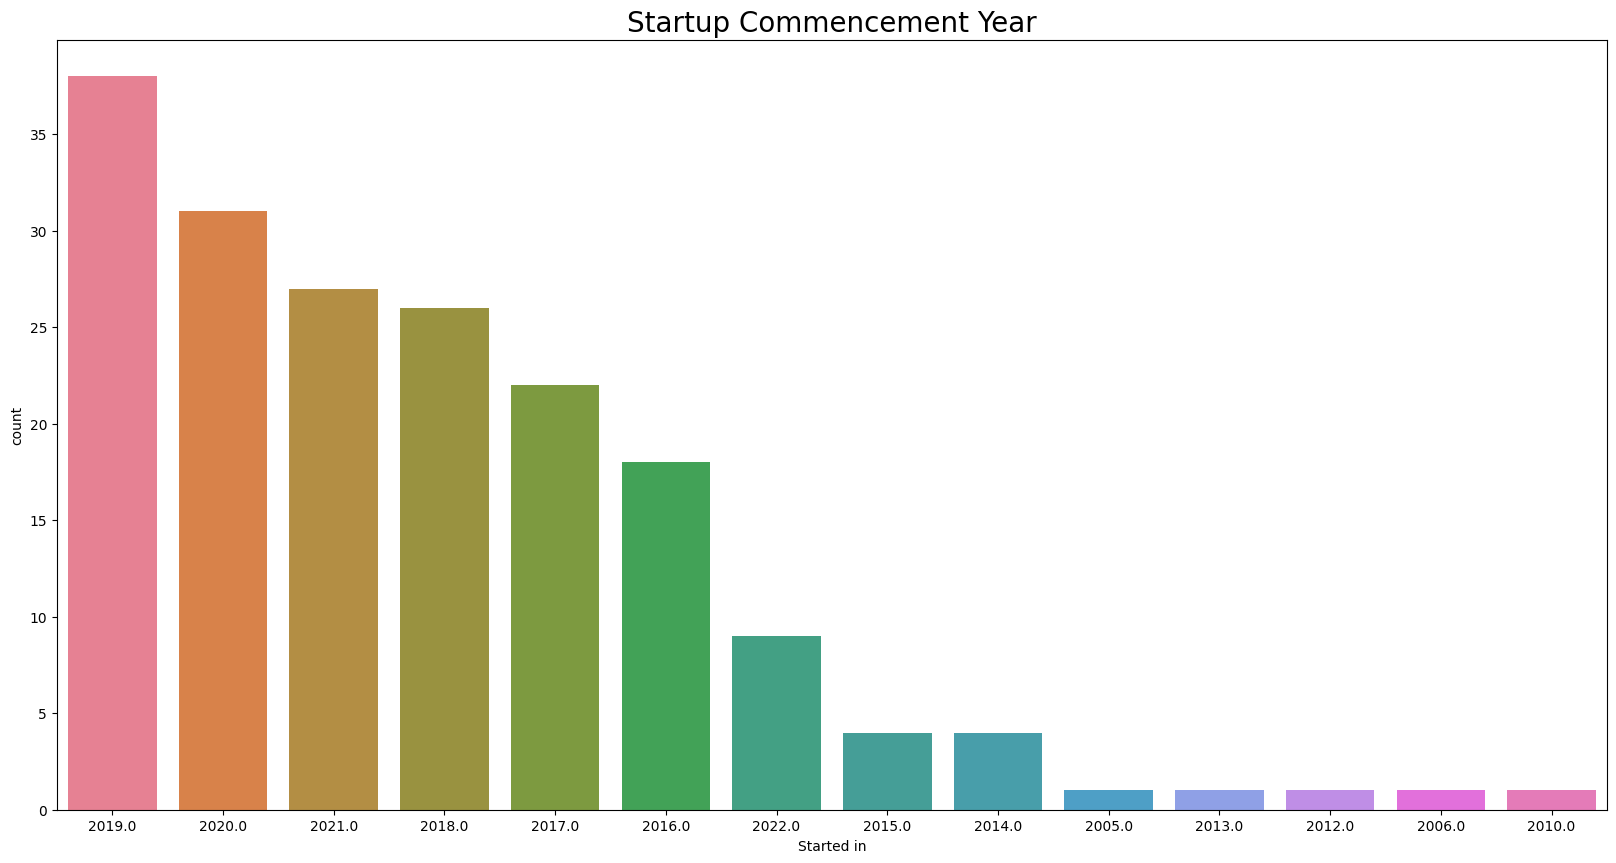

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(data=shark_tank,x='Started in', palette="husl", order=shark_tank['Started in'].value_counts().index)
plt.title('Startup Commencement Year',size=20)

### Distribution of States from which Pitchers came

In [22]:
print(shark_tank['Pitchers State'].value_counts())

Pitchers State
Maharashtra                  92
Delhi                        44
Karnataka                    34
Gujarat                      32
Haryana                      18
West Bengal                  13
Uttar Pradesh                13
Rajasthan                    12
Telangana                    12
Punjab                        8
Tamil Nadu                    8
Madhya Pradesh                5
Bihar                         4
Jammu & Kashmir               3
Goa                           3
Kerala                        2
Karnataka,West Bengal         1
Delhi,Punjab                  1
Uttarakhand                   1
Delhi,Maharashtra             1
Haryana,Madhya Pradesh        1
Himachal Pradesh              1
Jharkhand                     1
Karnataka,Telangana           1
Telangana,Maharashtra         1
Kerala,Maharashtra            1
Haryana,West Bengal           1
Chhattisgarh                  1
Haryana,Maharashtra           1
Karnataka,Andhra Pradesh      1
Jharkhand,Chhattisgarh   

Text(0.5, 1.0, 'Startup Commencement Year')

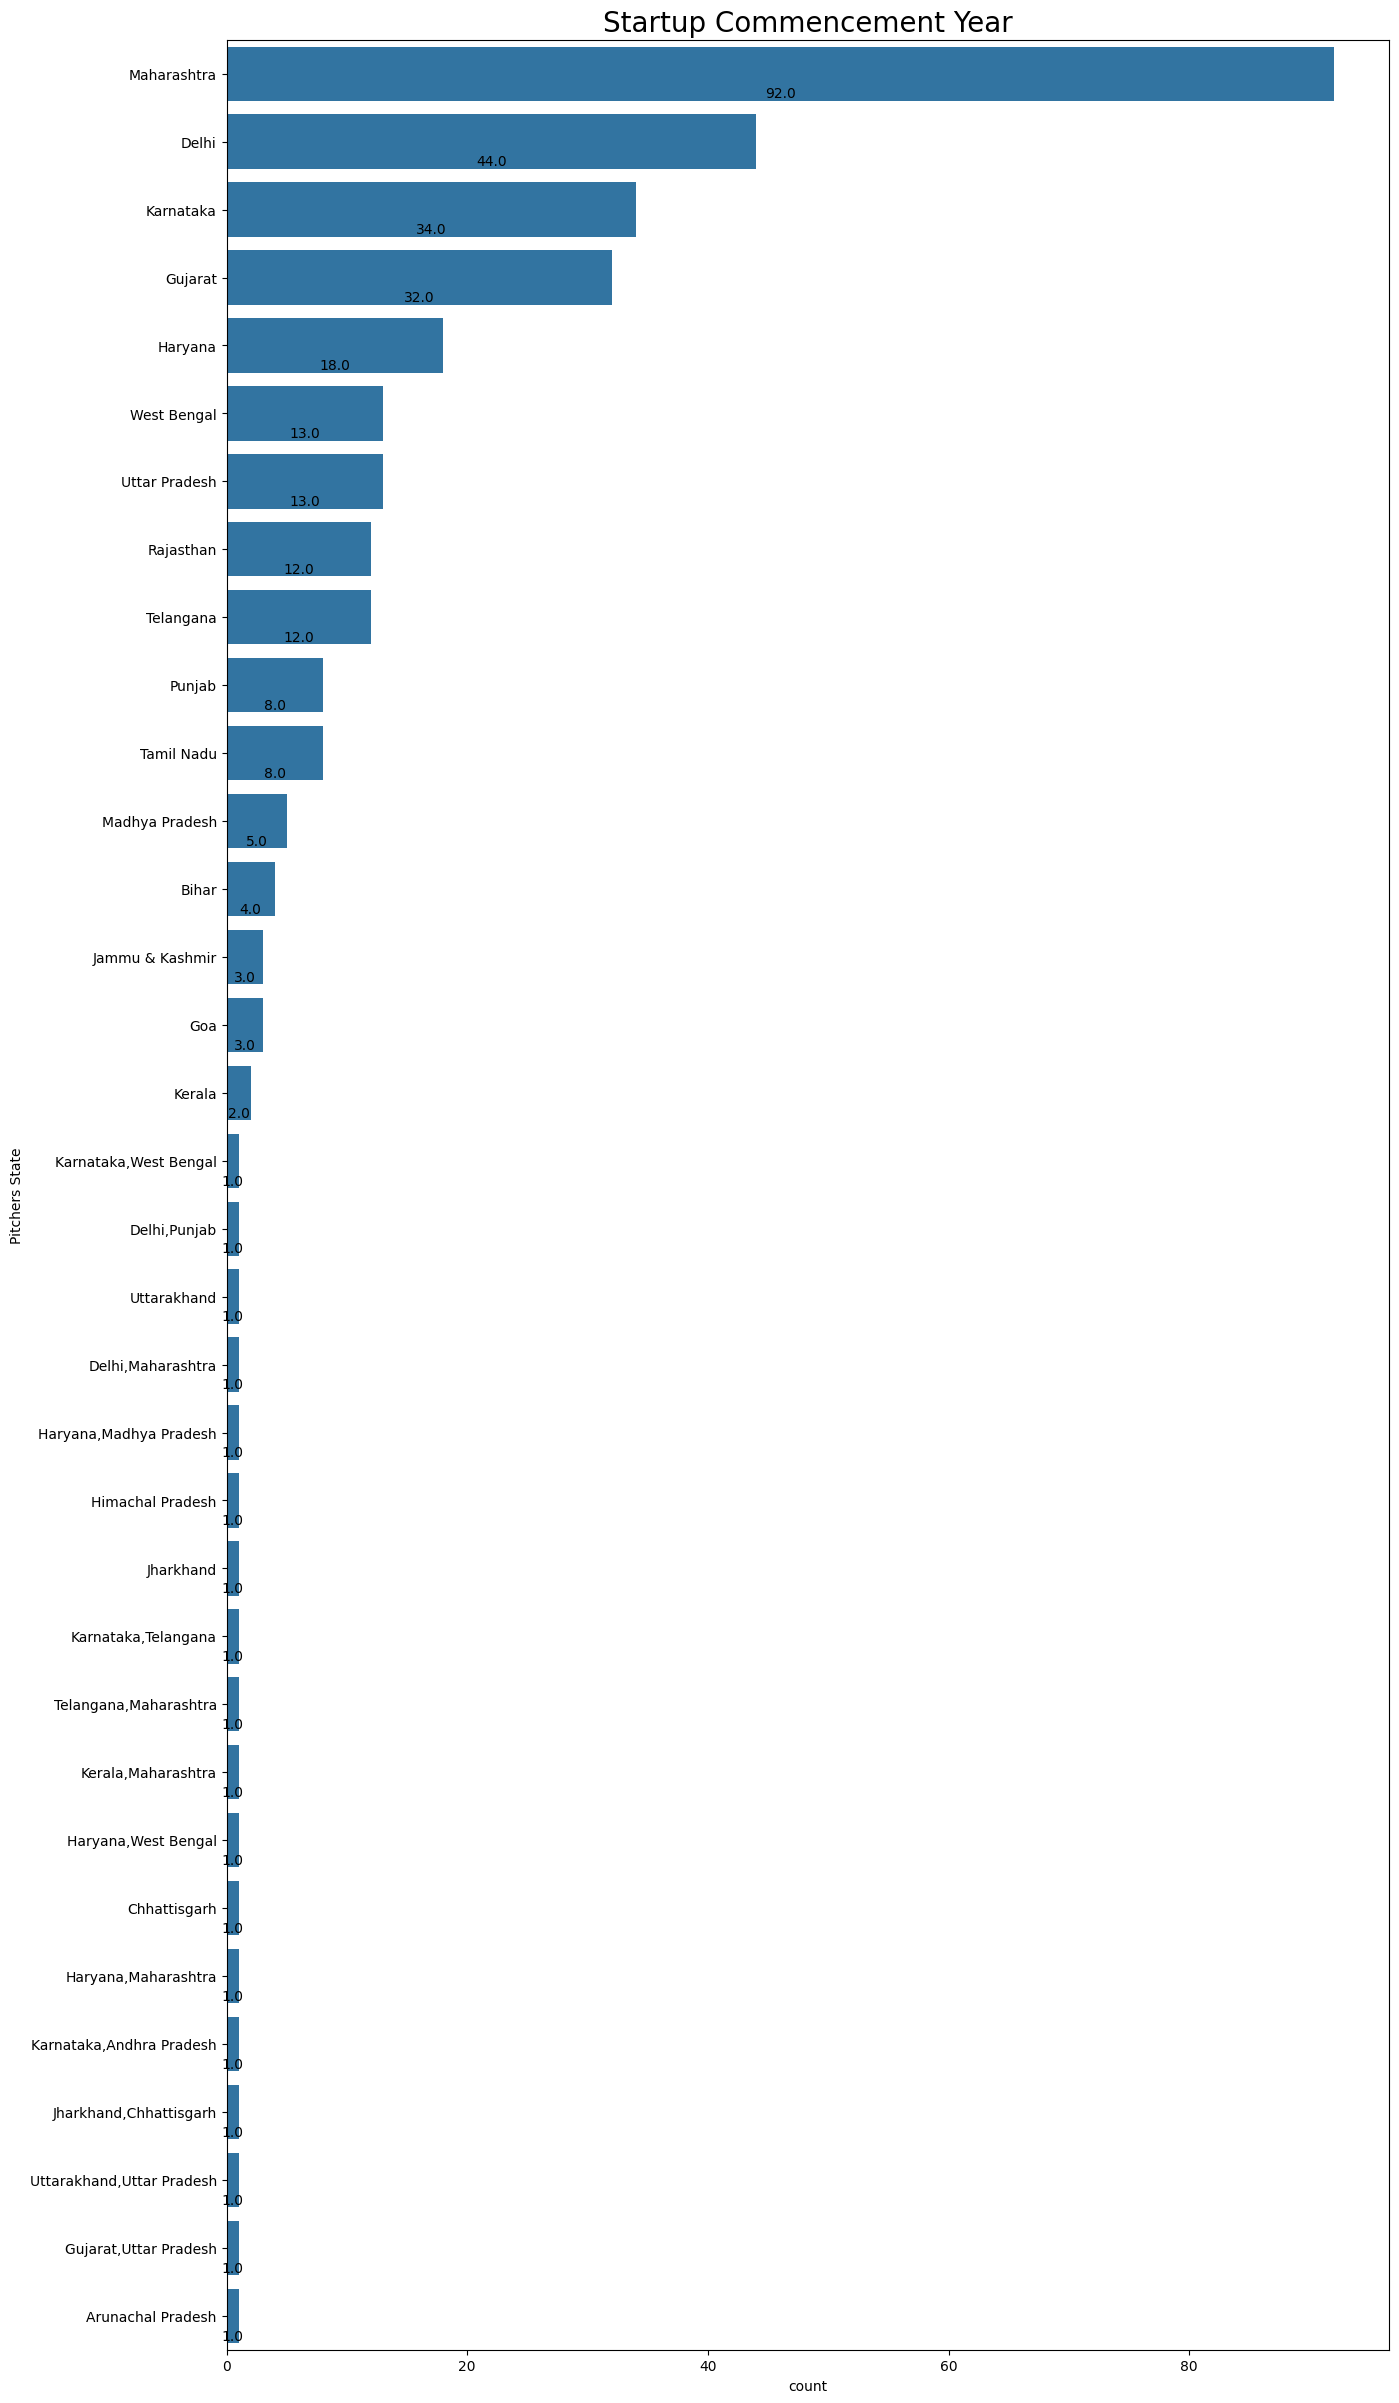

In [23]:
plt.figure(figsize=(15,30))
ax = sns.countplot(data=shark_tank,y='Pitchers State', orient='h',order=shark_tank['Pitchers State'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width() / 2, p.get_y() + p.get_height()), ha='center', va='bottom')
plt.title('Startup Commencement Year',size=20)

### Distribution of different Industries that came for pitching

In [24]:
print(shark_tank['Industry'].value_counts())

Industry
Food                            82
Beauty/Fashion                  58
Manufacturing                   38
Services                        28
Technology/Software             26
Medical/Health                  24
Furnishing/Household            13
Vehicles/Electrical Vehicles    13
Education                        9
Sports                           7
Liquor/Beverages                 7
Animal/Pets                      5
Electronics                      4
Agriculture                      3
Hardware                         2
Entertainment                    2
Name: count, dtype: int64


### Gender Wise Distribution of Entrepreneursn

In [25]:
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")

print("Total Male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")

print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100,2), "% (data incomplete)\n", sep='')


Total pitchers - 667 

Total Male pitchers - 485 

Total female pitchers - 179 

Male entrepreneurs percentage - 72.71%

Female entrepreneurs percentage - 26.84%

Couple entrepreneurs percentage - 8.85% (data incomplete)



## Top 10 Highest Yearly Revenue of the brands##

In [26]:
print(shark_tank.groupby('Startup Name')['Yearly Revenue'].max().nlargest(10))


Startup Name
FrenchCrown          7200.0
Rubans               5100.0
Toyshine             4500.0
GuardianGears        2500.0
GunjanAppsStudios    2400.0
UnStop               1600.0
StyloBug             1400.0
RaisingSuperstars    1300.0
DesmondJi            1200.0
Eume                 1200.0
Name: Yearly Revenue, dtype: float64


# Top 10 highest Gross Margin of different brands

In [27]:
# DataFrame which shows the Top 10 Start-ups which have the highest Gross Margin
shark_tank[['Startup Name','Gross Margin']].sort_values(by='Gross Margin',ascending=False).head(10)

,Startup Name,Gross Margin
69,Poo-de-Cologne,150.0
33,Farda,115.0
45,Cocofit,95.0
230,UnStop,90.0
256,MidNightAngelsByPC,83.0
195,Pflow,80.0
201,ekatra,80.0
291,oyehappy,80.0
225,LeafyAffair,80.0
34,Auli,80.0


In [28]:
# Visualization Code
highest_gross_margin = shark_tank[['Startup Name','Gross Margin']].sort_values(by='Gross Margin',ascending=False).head(10)
fig = px.bar(highest_gross_margin, x="Startup Name", y='Gross Margin', color="Startup Name", template='plotly', title="Highest Gross Margins Start-ups", text=highest_gross_margin['Gross Margin'])
fig.show()

# How many accepted or rejected sharks offers?

In [29]:
shark_tank['Accepted Offer'].value_counts()


,count
Accepted Offer,
1.0,176
0.0,41


In [30]:
# Numbers of Pithers who accepted/rejected shark's offer
print(f"{shark_tank['Accepted Offer'].value_counts().iloc[0]} Pitchers accepted the shark's offer.")
print(f"{shark_tank['Accepted Offer'].value_counts().iloc[1]} Pitchers rejected the shark's offer.")

176 Pitchers accepted the shark's offer.
41 Pitchers rejected the shark's offer.


<Axes: xlabel='Accepted Offer', ylabel='count'>

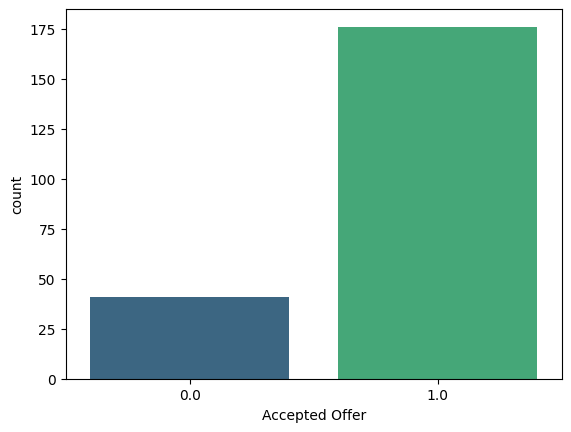

In [31]:
# Visualization Code
sns.countplot(data=shark_tank,x='Accepted Offer',palette='viridis')

# Startup Companies who rejected shark's offer

In [32]:
shark_tank[shark_tank['Accepted Offer'] == 0][['Season Number','Startup Name','Business Description',
                                               'Original Ask Amount','Original Offered Equity',
                                               'Valuation Requested',]]

,Season Number,Startup Name,Business Description,Original Ask Amount,Original Offered Equity,Valuation Requested
6,1,qZenseLabs,Food Freshness Detector,100.0,0.25,40000.000000
19,1,Torch-it,Gadgets for visually impaired people,75.0,1.00,7500.000000
21,1,LaKheerDeli,Kheer in variety of flavors,50.0,7.50,667.000000
27,1,KabiraHandmad,Healthy Edible Oils dairy products spices flour,100.0,5.00,2000.000000
41,1,MorrikoPureFoods,Healthy Food Snacks Kamdhenu foods,100.0,3.00,3333.000000
55,1,IndiaHempandCo,Hemp Food Products,50.0,4.00,1250.000000
60,1,KetoIndia,Customised Keto Diets for various Medical/Heal...,150.0,1.25,12000.000000
70,1,Moonshine,Meads,80.0,0.50,16000.000000
71,1,Falhari,Fresh Fruits salads,50.0,2.00,2500.000000
73,1,UrbanMonkey,Streetwear,100.0,1.00,10000.000000


# Industry wise Investments By different sharks

ASHNEER'S INVESTMENT

In [33]:
# Finding the count of various Industries
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

,count
Industry,
Food,8
Vehicles/Electrical Vehicles,3
Education,3
Manufacturing,2
Beauty/Fashion,2
Animal/Pets,1
Sports,1
Technology/Software,1


<Axes: ylabel='count'>

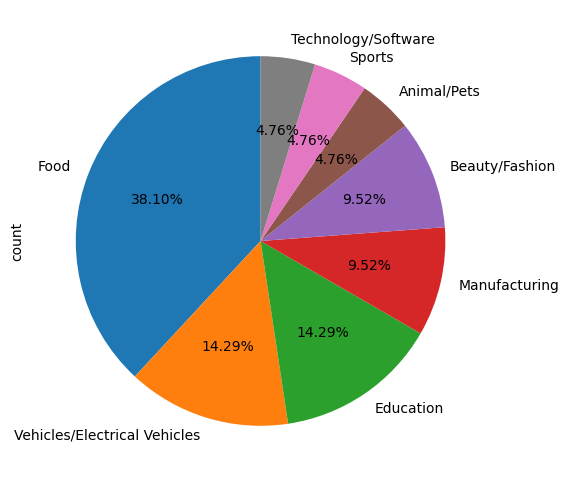

In [34]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Ashneer Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%', startangle=90)


In [35]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
tmpdf

,Startup Name,Ashneer Investment Amount,Ashneer Investment Equity
30,EventBeep,10.00,1.00
56,Otua,1.00,1.00
22,BeyondSnack,25.00,1.25
68,HairOriginals,20.00,1.33
46,BambooIndia,25.00,1.75
18,RaisingSuperstars,50.00,2.00
64,INACAN,20.00,2.00
39,TheYarnBazaar,25.00,2.50
59,WeSTOCK,15.00,2.50
3,TagzFoods,70.00,2.75


In [36]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Ashneer Investment Amount']>0] [["Startup Name","Ashneer Investment Amount","Ashneer Investment Equity"]].sort_values(by="Ashneer Investment Equity")
fig = px.bar(tmpdf, x="Ashneer Investment Equity", y='Ashneer Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Ashneer (in %) for investment (in lakhs)", text=tmpdf['Ashneer Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()




*   Ashneer's portfolio has more food industry based startups than any other sharks.




NAMITA'S INVESTMENT

In [37]:
# Finding the count of various Industries
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

,count
Industry,
Beauty/Fashion,13
Medical/Health,12
Food,11
Manufacturing,8
Services,6
Technology/Software,5
Education,3
Furnishing/Household,3
Sports,2


<Axes: ylabel='count'>

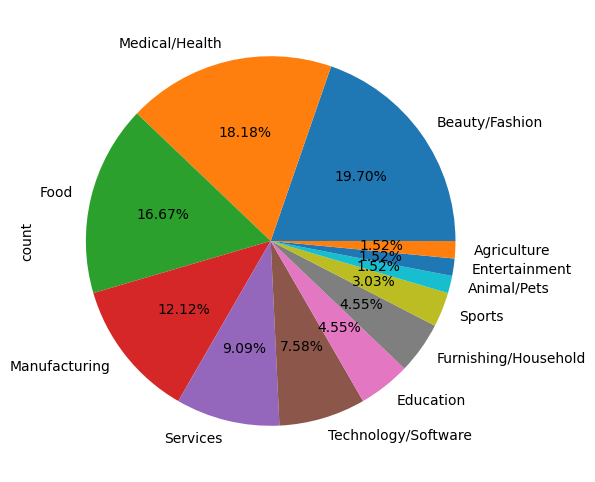

In [38]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')




*   Namita has more beauty and Fashion industry based startups than food based startups.




In [39]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
tmpdf

,Startup Name,Namita Investment Amount,Namita Investment Equity
159,Stage,50.00,0.200
209,Snitch,30.00,0.300
240,MindPeers,17.66,0.330
306,Rubans,33.33,0.333
279,GROWiT,25.00,0.500
...,...,...,...
34,Auli,75.00,15.000
16,Menstrupedia,50.00,20.000
160,Girgit,20.00,20.000
264,HoloKitab,45.00,25.000


In [40]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.bar(tmpdf, x="Namita Investment Equity", y='Namita Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Namita (in %) for investment (in lakhs)", text=tmpdf['Namita Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

ANUPAM'S INVESTMENT

In [41]:
# Finding the count of various Industries
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)


,count
Industry,
Food,13
Beauty/Fashion,11
Manufacturing,7
Medical/Health,6
Technology/Software,3
Education,2
Vehicles/Electrical Vehicles,2
Animal/Pets,1
Sports,1


<Axes: ylabel='count'>

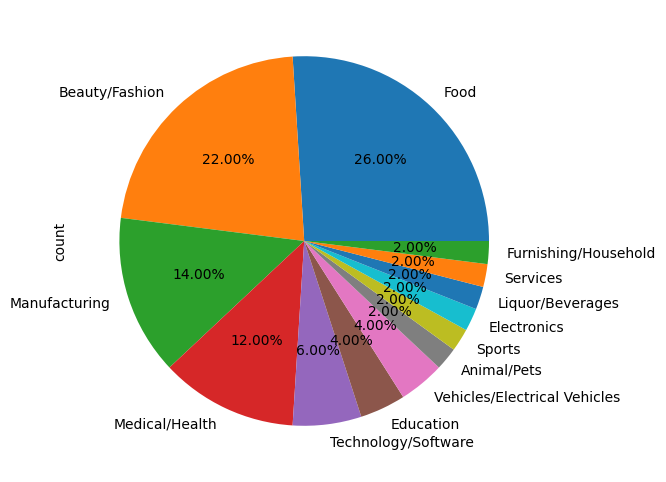

In [42]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Anupam Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')


* Food also dominate the chart like Ashneer's followed by Beauty/Fashion in Anupam's investment portfolio.

In [43]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
tmpdf

,Startup Name,Anupam Investment Amount,Anupam Investment Equity
209,Snitch,30.000000,0.300
281,Trunome,37.500000,0.500
12,RevampMoto,50.000000,0.750
37,Annie,35.000000,1.000
219,PadCare,25.000000,1.000
230,UnStop,50.000000,1.000
86,WattTechnovations,0.000253,1.000
274,Pharmallama,40.000000,1.000
80,SunfoxTechnologies,20.000000,1.200
68,HairOriginals,20.000000,1.330


In [44]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.bar(tmpdf, x="Anupam Investment Equity", y='Anupam Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Anupam (in %) for investment (in lakhs)", text=tmpdf['Anupam Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

### VINEETA'S INVESTMENT

In [48]:
# Finding the count of various Industries
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

,count
Industry,
Food,17
Beauty/Fashion,10
Medical/Health,3
Manufacturing,3
Vehicles/Electrical Vehicles,2
Furnishing/Household,2
Liquor/Beverages,2
Electronics,1
Sports,1


<Axes: ylabel='count'>

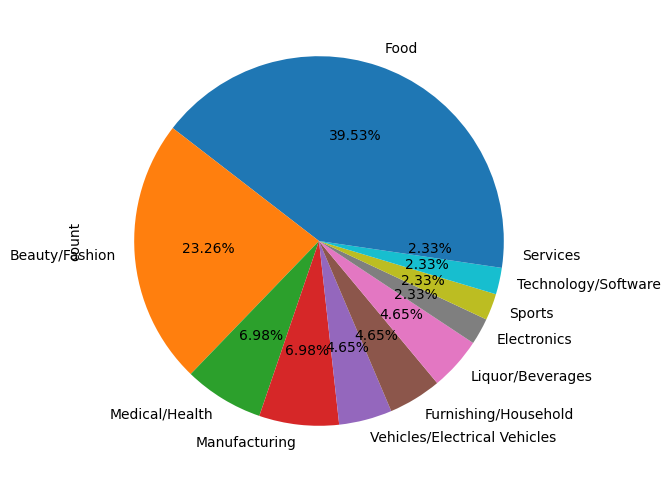

In [49]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')




*   Vineeta's portfolio has 39.53% Food based start-ups followed by 23.26% Beauty/Fashion based start-ups.




In [50]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.bar(tmpdf, x="Vineeta Investment Equity", y='Vineeta Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Vineeta (in %) for investment (in lakhs)", text=tmpdf['Vineeta Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

### AMAN'S INVESTMENT

In [51]:
# Finding the count of various Industries
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

,count
Industry,
Food,18
Beauty/Fashion,14
Medical/Health,8
Manufacturing,7
Technology/Software,7
Services,7
Education,3
Vehicles/Electrical Vehicles,3
Liquor/Beverages,2


<Axes: ylabel='count'>

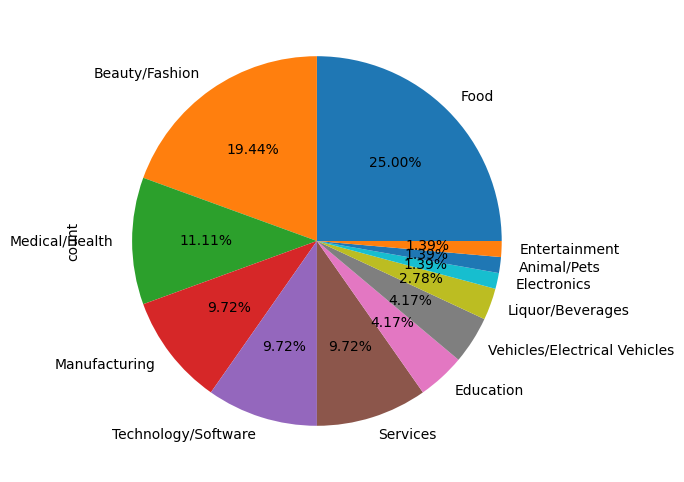

In [52]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Aman Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')





*   Aman has more Food and Beauty/Fashion based start-ups in his portfolio followed by other groups.
*   




In [53]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
tmpdf

,Startup Name,Aman Investment Amount,Aman Investment Equity
159,Stage,50.00,0.200
277,Hood,30.00,0.270
209,Snitch,30.00,0.300
240,MindPeers,17.66,0.330
306,Rubans,33.33,0.333
...,...,...,...
33,Farda,15.00,10.000
72,NamhyaFoods,50.00,10.000
228,Manetain,75.00,10.000
213,Dabble,15.00,10.000


In [54]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.bar(tmpdf, x="Aman Investment Equity", y='Aman Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Aman (in %) for investment (in lakhs)", text=tmpdf['Aman Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

### PEYUSH'S INVESTMENT

In [55]:

# Finding the count of various Industries
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False)

,count
Industry,
Medical/Health,11
Manufacturing,11
Food,8
Technology/Software,8
Services,8
Beauty/Fashion,7
Education,3
Liquor/Beverages,2
Agriculture,2


<Axes: ylabel='count'>

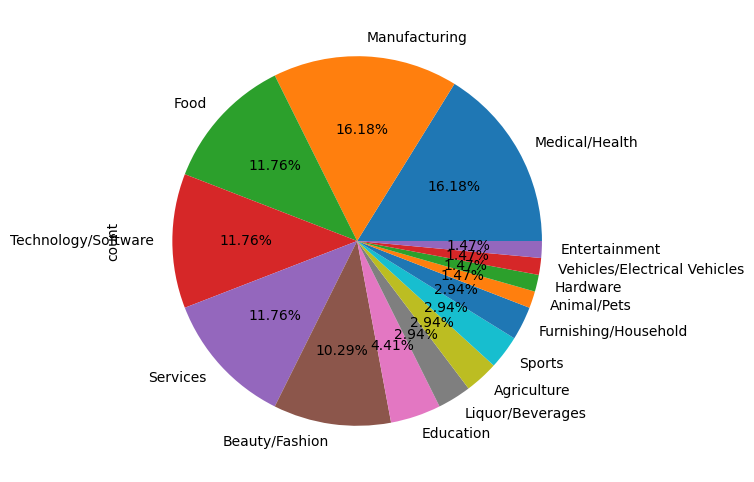

In [56]:
# Plotting the chart
plt.figure(figsize=(12,6))
shark_tank[shark_tank['Peyush Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')




*   Peyush's portfolio is dominated by Medical/Health, Manufacturing, Technology/Software and Food.




In [57]:
# Viewing the DataFrame
tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
tmpdf

,Startup Name,Peyush Investment Amount,Peyush Investment Equity
159,Stage,50.0,0.20
277,Hood,30.0,0.27
209,Snitch,30.0,0.30
279,GROWiT,25.0,0.50
281,Trunome,37.5,0.50
...,...,...,...
53,RoadBounce,80.0,20.00
44,PNT,25.0,25.00
77,KGAgrotech,10.0,40.00
82,IsakFragrances,50.0,50.00


In [58]:
# Visualization Code
tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.bar(tmpdf, x="Peyush Investment Equity", y='Peyush Investment Amount', color="Startup Name", template='plotly', title="Total equity received by Peyush (in %) for investment (in lakhs)", text=tmpdf['Peyush Investment Amount'].map(int).map(str) + " lakhs")
fig.update_layout(dict(xaxis = dict(type="category")))
fig.show()

### Number of sharks in a deal

Number of sharks in deal
1.0    42%
2.0    31%
3.0    16%
4.0     7%
5.0     5%
Name: proportion, dtype: object


<Axes: xlabel='Number of sharks in deal', ylabel='count'>

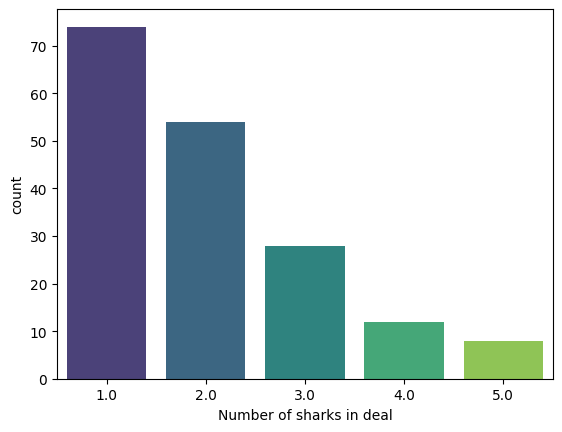

In [59]:
# Visualization Code
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True) * 100).astype(str).str.replace('.0','%'))
sns.countplot(data=shark_tank,x='Number of sharks in deal',palette='viridis')

In [60]:
# The deal where more than or equal to 5 sharks were involved
tmdf = shark_tank[shark_tank['Number of sharks in deal'] >= 5][['Startup Name','Total Deal Amount','Total Deal Equity']]
tmdf

,Startup Name,Total Deal Amount,Total Deal Equity
15,SkippiIcePops,100.0,15.0
50,FindYourKicksIndia,50.0,25.0
64,INACAN,100.0,10.0
80,SunfoxTechnologies,100.0,6.0
209,Snitch,150.0,1.5
239,Mahantam,30.0,20.0
274,Pharmallama,200.0,5.0
311,Sahayatha,100.0,10.0


##Total Amount Asked by the Pitchers

In [61]:
# Amount asked by the pitchers
print(format_currency(shark_tank['Original Ask Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''), 'crores')

₹541.41 crores


##Total Amount Invested by the sharks


In [62]:
# Amount invested by the sharks
print(format_currency(shark_tank['Total Deal Amount'].sum()/100,'INR',locale='en_IN').replace('.00',''), 'crores')

₹110.06 crores


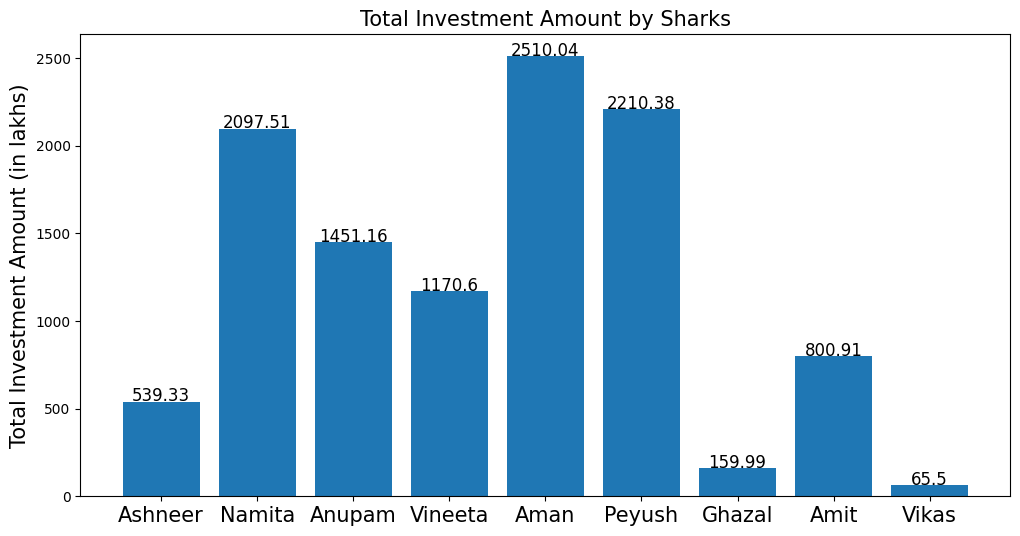

In [63]:
# Visualization Code
amount = [shark_tank['Ashneer Investment Amount'].sum(), shark_tank['Namita Investment Amount'].sum(), shark_tank['Anupam Investment Amount'].sum(), shark_tank['Vineeta Investment Amount'].sum(),
    shark_tank['Aman Investment Amount'].sum(), shark_tank['Peyush Investment Amount'].sum(), shark_tank['Ghazal Investment Amount'].sum(), shark_tank['Amit Investment Amount'].sum(), shark_tank['Guest Investment Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal','Amit','Vikas']
df = {'Name':name, 'Total Amount':amount }
plt.figure(figsize=(12,6))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Investment Amount (in lakhs)",fontsize=15)
for index,d in enumerate(amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount by Sharks", fontsize=15)
plt.show()

Total Amount Lent by the Sharks

In [64]:
# Amount invested by the sharks
print(format_currency(shark_tank['Total Deal Debt'].sum()/100,'INR',locale='en_IN').replace('.00',''), 'crores')

₹18.11 crores


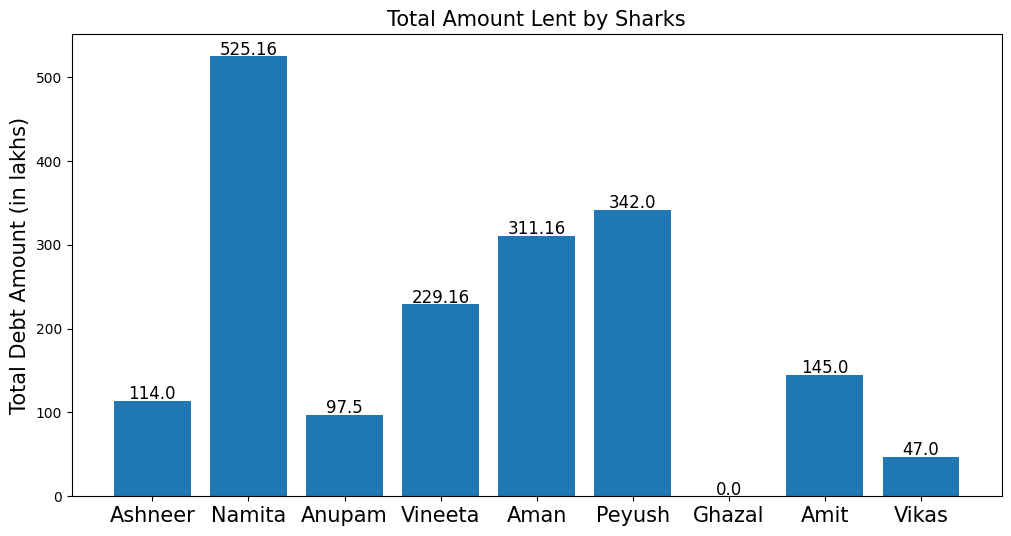

In [65]:
# Visualization Code
amount = [shark_tank['Ashneer Debt Amount'].sum(), shark_tank['Namita Debt Amount'].sum(), shark_tank['Anupam Debt Amount'].sum(), shark_tank['Vineeta Debt Amount'].sum(),
    shark_tank['Aman Debt Amount'].sum(), shark_tank['Peyush Debt Amount'].sum(), shark_tank['Ghazal Debt Amount'].sum(), shark_tank['Amit Debt Amount'].sum(), shark_tank['Guest Debt Amount'].sum()]
name=['Ashneer','Namita','Anupam','Vineeta','Aman','Peyush','Ghazal','Amit','Vikas']
df = {'Name':name, 'Total Amount':amount }
plt.figure(figsize=(12,6))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.ylabel("Total Debt Amount (in lakhs)",fontsize=15)
for index,d in enumerate(amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Amount Lent by Sharks", fontsize=15)
plt.show()
